In [61]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics

In [62]:
data_0 = pd.read_csv('FIFA22_official_data.csv')

In [63]:
#data_1: randomly choose 15000 samples from the massive dataset
#data_2: PCA dataset

data_1 = data_0.sample(n = 15000, replace = True)
y = data_1['Overall']                                 
X = data_1.drop('Overall', axis = 1)
X = X.fillna(data_2.mean)
rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=rng)
print(X_train.shape)

(10500, 21)


components after dim reduction: (10500, 0)
components after dim reduction: (10500, 1)
components after dim reduction: (10500, 2)
components after dim reduction: (10500, 3)
components after dim reduction: (10500, 4)
components after dim reduction: (10500, 5)
components after dim reduction: (10500, 6)
components after dim reduction: (10500, 7)
components after dim reduction: (10500, 8)
components after dim reduction: (10500, 9)
components after dim reduction: (10500, 10)
components after dim reduction: (10500, 11)
components after dim reduction: (10500, 12)
components after dim reduction: (10500, 13)
components after dim reduction: (10500, 14)
components after dim reduction: (10500, 15)
components after dim reduction: (10500, 16)
components after dim reduction: (10500, 17)
components after dim reduction: (10500, 18)
components after dim reduction: (10500, 19)
components after dim reduction: (10500, 20)


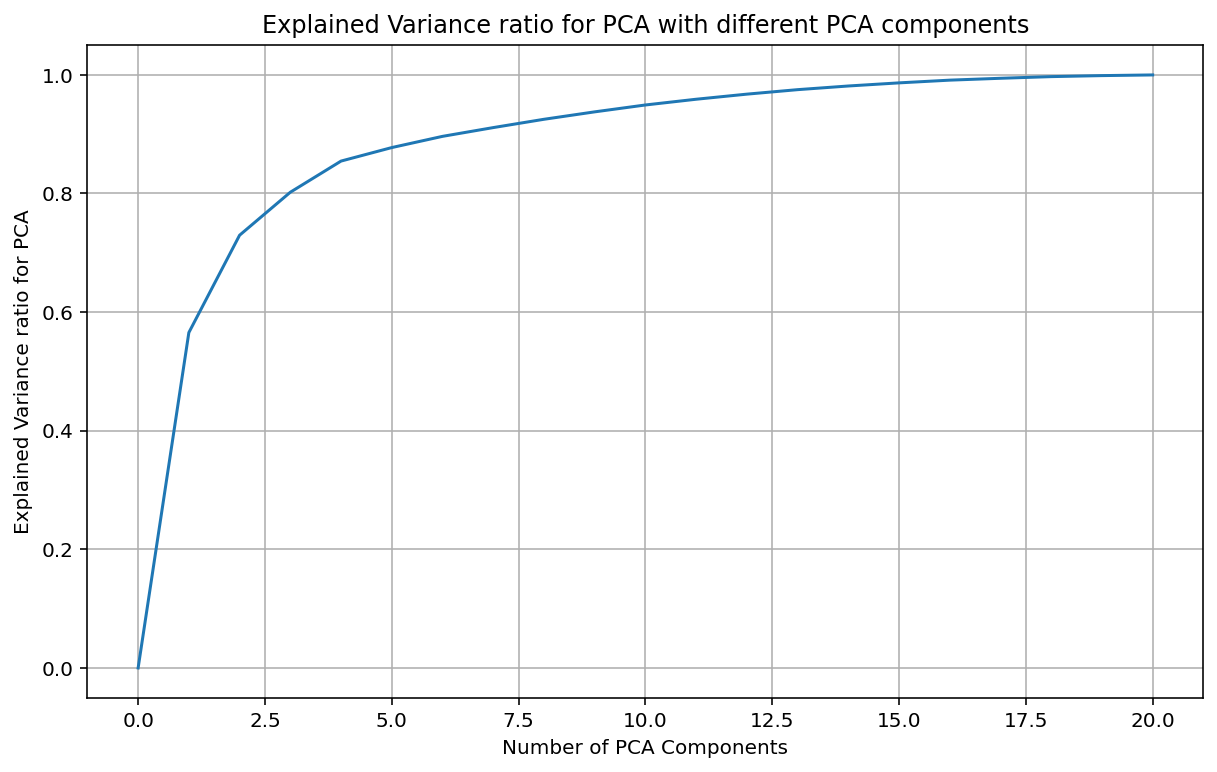

[0.56551001 0.16412502 0.07248568 0.052545   0.0227631  0.01890716
 0.01477706 0.01401037 0.01253209 0.01159544 0.00967245 0.00859474
 0.00756371 0.00618475 0.00526409 0.00459173 0.00314729 0.00279191
 0.00170666 0.00114706]


In [71]:
candidate_components = range(0,21,1)
explained_ratios = []
for a in candidate_components:
    pca = PCA(n_components = a)
    pca.fit(X_train)
    pca.transform(X_train)
    print('components after dim reduction:', pca.transform(X_train).shape)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
    pass

plt.figure(figsize = (10,6),dpi = 144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance ratio for PCA')
plt.title('Explained Variance ratio for PCA with different PCA components')
plt.show()
print(pca.explained_variance_ratio_)

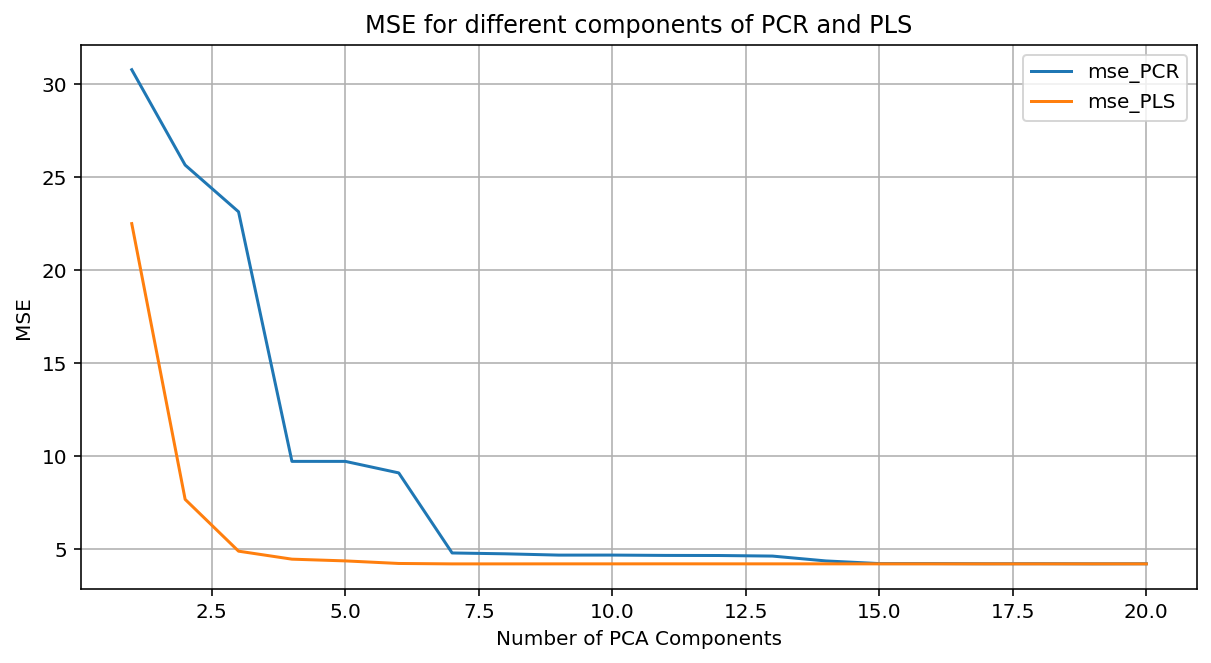

In [70]:
candidate_components = range(1,21,1)
mse_pcr_y = []
mse_pls_y = []
mse_l_reg_y = []
for a in candidate_components:
    pcr = make_pipeline(StandardScaler(), PCA(n_components = a), LinearRegression())
    pcr.fit(X_train, y_train)
    pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

    pls = PLSRegression(n_components = a)
    pls.fit(X_train, y_train)

    y_pred_pcr = pcr.predict(X_test)
    mse_pcr = metrics.mean_squared_error(y_test, y_pred_pcr)
    
    y_pred_pls = pls.predict(X_test)
    mse_pls = metrics.mean_squared_error(y_test, y_pred_pls)

    mse_pcr_y.append(mse_pcr)
    mse_pls_y.append(mse_pls)
    pass

plt.figure(figsize = (10,5),dpi = 144)
plt.grid()
plt.plot(candidate_components, mse_pcr_y, label = 'mse_PCR')
plt.plot(candidate_components, mse_pls_y, label = 'mse_PLS')
plt.xlabel('Number of PCA Components')
plt.ylabel('MSE')
plt.title('MSE for different components of PCR and PLS')
plt.legend()
plt.show()

In [66]:
#choose the components that can exceed 90%

pca_1 = PCA(n_components = 0.9)
pca_1.fit(X_train)

print(pca_1.explained_variance_ratio_)
print(pca_1.explained_variance_)
print(pca_1.n_components_)
print(pca_1.transform(X_train))

[0.56551001 0.16412502 0.07248568 0.052545   0.0227631  0.01890716
 0.01477706]
[2670.84391805  775.14510282  342.34221655  248.16447651  107.50770612
   89.29650262   69.79051064]
7
[[-31.82984923 -29.5419918    2.1236286  ...  15.36212874 -11.73825595
  -12.93468249]
 [-20.94155454  30.40476887  -2.16629412 ...  20.48939128 -17.51438363
    0.6680542 ]
 [-41.5525666   14.91440921  -1.12429195 ...   5.41745164 -14.68194854
    3.56053553]
 ...
 [-52.98217259  -3.3120812  -10.2436454  ...   7.92547356   3.26760238
   -3.90117619]
 [-48.25909426  25.19532959  25.9851553  ...  -2.61849461  -9.09800177
   10.54987549]
 [ -3.97368494 -25.96733702 -34.44206519 ...  10.72530697  -7.71947134
   14.34502489]]


In [67]:
pca_result = pca_1.fit_transform(X_train)
df = pd.DataFrame(pca_result)
df_PCA =df.round(decimals = 3)
print(df_PCA)

pcr = make_pipeline(StandardScaler(), PCA(n_components=7), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)

             0       1       2       3       4       5       6
0      -31.830 -29.542   2.124 -11.453  15.362 -11.738 -12.935
1      -20.942  30.405  -2.166   7.672  20.489 -17.514   0.668
2      -41.553  14.914  -1.124  13.746   5.417 -14.682   3.561
3       -9.872 -47.412 -23.740  -5.652   4.714  24.756 -11.524
4      120.621   7.054  16.903   6.180  17.262  11.606  -0.848
...        ...     ...     ...     ...     ...     ...     ...
10495   23.040   8.528 -22.660  -3.326  -0.340  -0.773  -7.497
10496  -20.242 -26.445  -0.635   5.675  -8.659  -3.910  -1.331
10497  -52.982  -3.312 -10.244  23.212   7.925   3.268  -3.901
10498  -48.259  25.195  25.985  20.809  -2.618  -9.098  10.550
10499   -3.974 -25.967 -34.442  -8.329  10.725  -7.719  14.345

[10500 rows x 7 columns]


PLSRegression(n_components=7)

In [72]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

y_pred_pcr = pcr.predict(X_test)
mse_pcr = metrics.mean_squared_error(y_test, y_pred_pcr)
print('mse_pcr', mse_pcr)

y_pred_pls = pls.predict(X_test)
mse_pls = metrics.mean_squared_error(y_test, y_pred_pls)
print('mse_pls',mse_pls)
pls.coef_

PCR r-squared 0.898
PLS r-squared 0.898
mse_pcr 4.198282216980696
mse_pls 4.192904624970339


array([[ 2.71043069],
       [ 3.12164004],
       [-0.00389995],
       [ 0.3426327 ],
       [-0.24907846],
       [-0.30798406],
       [ 0.56357998],
       [-0.40723678],
       [-0.04448598],
       [ 0.08203276],
       [ 0.47289081],
       [ 0.29422621],
       [ 0.29492469],
       [ 2.41063741],
       [ 0.82540225],
       [ 0.32715599],
       [ 0.59768349],
       [-0.48595648],
       [-0.31368086],
       [-0.55563587],
       [-0.24525624]])